In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import ast
from adjustText import adjust_text
import seaborn as sns

# Loading Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills_list: ast.literal_eval(skills_list) if pd.notna(skills_list) else skills_list)

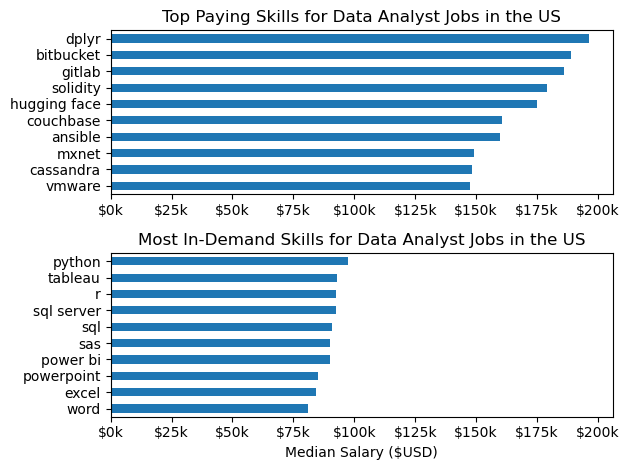

In [2]:
# Filtering Data for Data Analyst Jobs in the US, and dropping NaN salary values
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_da_us['salary_year_avg'].dropna(inplace= True)

# Job skills exploded for analysis, grouping by skill to get count and median salary, and sorting and grabbing top 10 by median salary and count
df_da_us = df_da_us.explode('job_skills')
df_da_group = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_da_top_pay = df_da_group.sort_values(by= 'median', ascending= False).head(10)
df_da_skills = df_da_group.sort_values(by= 'count', ascending= False).head(10).sort_values(by= 'median', ascending= False)

# fig, ax for 2 by 1 subplot, horizontal plots for generated dataframes, anf formating
fig,ax = plt.subplots(2, 1)

df_da_top_pay[::-1].plot(kind= 'barh',y= 'median', ax= ax[0], legend= False)
df_da_skills[::-1].plot(kind= 'barh', y= 'median', ax= ax[1], legend= False)


ax[0].set_title('Top Paying Skills for Data Analyst Jobs in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}k"))

ax[1].set_title('Most In-Demand Skills for Data Analyst Jobs in the US')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}k"))

fig.tight_layout()
plt.show()


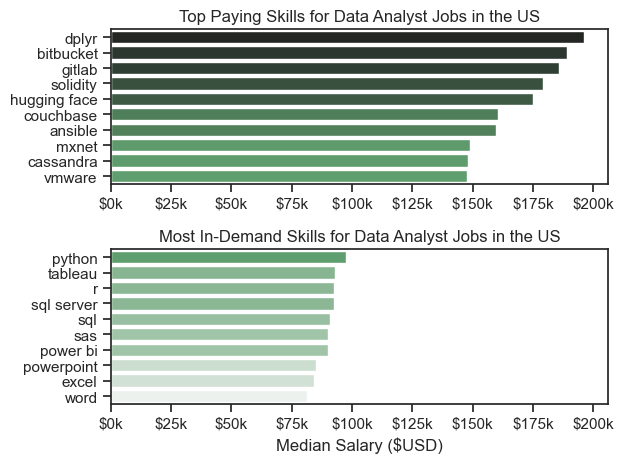

In [22]:
# fig, ax for 2 by 1 subplot, horizontal plots for generated dataframes, anf formating
fig,ax = plt.subplots(2, 1)

sns.set_theme(style= 'ticks')
sns.barplot(data= df_da_top_pay, x= 'median', y= df_da_top_pay.index, ax= ax[0], hue= 'median', palette= 'dark:g_r')
sns.barplot(data= df_da_skills, x= 'median', y= df_da_skills.index, ax= ax[1], hue= 'median', palette= 'light:g')
# df_da_top_pay[::-1].plot(kind= 'barh',y= 'median', ax= ax[0], legend= False)
# df_da_skills[::-1].plot(kind= 'barh', y= 'median', ax= ax[1], legend= False)


ax[0].set_title('Top Paying Skills for Data Analyst Jobs in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}k"))
ax[0].legend_.remove()

ax[1].set_title('Most In-Demand Skills for Data Analyst Jobs in the US')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}k"))
ax[1].legend_.remove()


fig.tight_layout()
plt.show()


In [4]:
df_da_us.value_counts(['job_skills', 'salary_rate'])

job_skills     salary_rate
sql            year           2508
               hour           1853
excel          year           1808
               hour           1645
python         year           1431
                              ... 
selenium       year              1
               month             1
               hour              1
elasticsearch  hour              1
node.js        year              1
Name: count, Length: 391, dtype: int64

## Histogram

In [11]:
df_da_us['salary_year_avg']

36       NaN
68       NaN
68       NaN
73       NaN
73       NaN
          ..
785685   NaN
785703   NaN
785705   NaN
785705   NaN
785705   NaN
Name: salary_year_avg, Length: 254289, dtype: float64

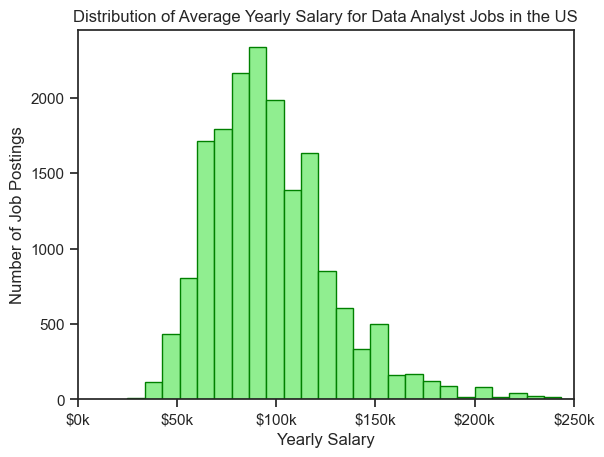

In [5]:
df_da_us['salary_year_avg'].plot(kind= 'hist', bins= 40, edgecolor= 'green', color= 'lightgreen')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}k"))

plt.xlim(0, 250000)
plt.title('Distribution of Average Yearly Salary for Data Analyst Jobs in the US')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Job Postings')
plt.show()

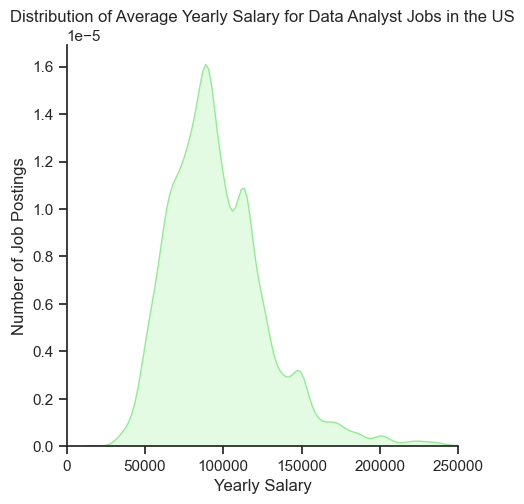

In [10]:
sns.displot(df_da_us['salary_year_avg'], kind= 'kde', fill= True, color= 'lightgreen')


plt.xlim(0, 250000)
plt.title('Distribution of Average Yearly Salary for Data Analyst Jobs in the US')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Job Postings')
plt.show()

## Box Plots

In [20]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
df_us = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_us = df_us.dropna(subset=['salary_year_avg'])

df_us

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."


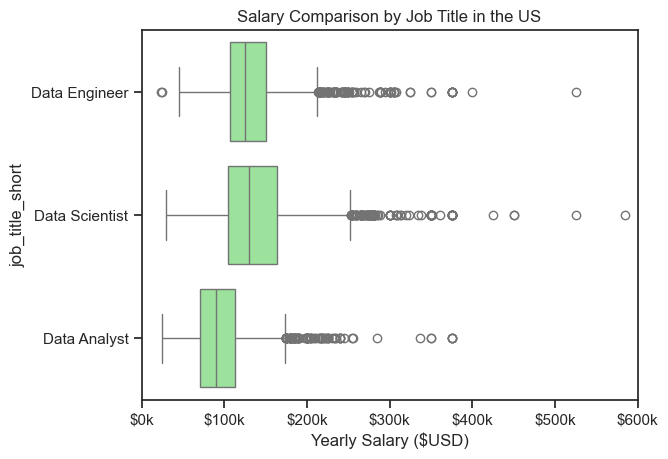

In [21]:
sns.boxplot(data= df_us, x= 'salary_year_avg', y= 'job_title_short', color= 'lightgreen')


plt.title('Salary Comparison by Job Title in the US')
plt.xlabel('Yearly Salary ($USD)')
plt.xlim(0, 600000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}k"))
plt.show()